*   Modelagem e Simulação - Inferência Estatística (Preparação e Tranformação de Dados)

*   Felipe Daniel Dias dos Santos - 11711ECP004

*   Graduação em Engenharia de Computação - Faculdade de Engenharia Elétrica - Universidade Federal de Uberlândia

Um dos primeiros passos em Ciência de Dados é a preparação e transformação dos dados, de modo a prepará-los para etapas posteriores. Vamos considerar dados com elementos duplicados ou faltantes e realizar a sua limpeza. Também vamos considerar métodos básicos de pré-processamento e transformação de dados.

Primeiramente, vamos obter um conjunto de dados com erros:

In [ ]:
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import random

random.seed(1)

drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/Colab Notebooks/dados/'

data = pd.read_csv(root_path + 'iris_with_errors.csv', header = (0))
print("Número de linhas e colunas:", data.shape)
data.head(25)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Número de linhas e colunas: (25, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


Para preparar os dados, é necessário remover os "NaN" (not a number, que representam valores desconhecidos) do arquivo, apagando as linhas que contém esse problema:

In [ ]:
data = data.dropna() 
data.head(25)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada


Após, é necessário remover as linhas duplicadas. Para isso, inicialmente verificamos se há a ocorrência dessas linhas:

In [ ]:
data.duplicated()

0     False
1      True
2     False
3     False
4      True
6     False
7     False
8      True
10    False
11    False
12    False
13    False
14     True
15    False
16    False
17     True
18    False
19    False
20    False
21    False
22    False
23    False
dtype: bool

Para realizamos a remoção, usamos um método da biblioteca Pandas:

In [ ]:
data = data.drop_duplicates()
data.head(25)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa
13,5.4,3.7,1.5,0.2,setosa
15,4.8,3.4,1.6,0.2,setosa


Após, é necessário remover as linhas que contenham "?" ou qualquer outro caracter que indique um erro ou entrada faltante. Primeiramente, convertemos essas entradas para "NaN":

In [ ]:
data = data.replace('?', np.nan)
data.head(25)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
2,NaN,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa
13,5.4,3.7,1.5,0.2,setosa
15,4.8,3.4,1.6,0.2,setosa


A seguir, é realizada a remoção:

In [ ]:
data = data.dropna()
data.head(25)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
3,4.7,3.2,1.3,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa
13,5.4,3.7,1.5,0.2,setosa
15,4.8,3.4,1.6,0.2,setosa
16,4.8,3,1.4,0.1,setosa


Ao fim desse processo, temos um conjunto de dados sem erros e entradas duplicadas.

Também é possível remover determinadas linhas e colunas dos dados. Para remover a segunda e quarta colunas:

In [ ]:
print("Atributos atuais:", data.columns)
print("Colunas removidas:", data.columns[[1, 3]])
data = data.drop(data.columns[[1, 3]], axis = 1)
data.head(25)

Atributos atuais: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Colunas removidas: Index(['sepal_width', 'petal_width'], dtype='object')


,sepal_length,petal_length,species
0,5.1,1.4,duplicada
3,4.7,1.3,setosa
6,5,1.4,setosa
7,5.4,1.7,duplicada
10,5,1.5,setosa
11,4.4,1.4,duplicada
12,4.9,1.5,setosa
13,5.4,1.5,setosa
15,4.8,1.6,setosa
16,4.8,1.4,setosa


Para remover a primeira e terceira linhas:

In [ ]:
data = data.drop(data.index[[0, 2]], axis = 0)
print("Linhas Removidas:", data.index[[0, 2]])
data.head(25)

Linhas Removidas: Int64Index([3, 10], dtype='int64')


,sepal_length,petal_length,species
3,4.7,1.3,setosa
7,5.4,1.7,duplicada
10,5,1.5,setosa
11,4.4,1.4,duplicada
12,4.9,1.5,setosa
13,5.4,1.5,setosa
15,4.8,1.6,setosa
16,4.8,1.4,setosa
18,4.3,1.1,setosa
19,5.8,1.2,setosa


Em muitas siutações, a matriz de atributos pode conter valores ausentes. Nesse caso, podemos usar diferentes métodos para substituir tais valores, como preenche-los com valores médios ou medianas. Vamos obter os dados novamente:

In [ ]:
data = pd.read_csv(root_path + 'iris-with-errors.csv', header = (0))
print(data.shape)
data.head(25)

(25, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


Os valores com 'NaN' e '?' serão substituídos pelos valores médios dos atributos. Primeiramente, mudamos as entradas '?' para 'NaN', como foi feito anteriormente:

In [ ]:
data = data.replace('?', np.nan)
data.head(25)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,NaN,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


A seguir, inserimos a média de cada atributo nas entradas com valores 'NaN':

In [ ]:
X = np.array(data[data.columns[0:data.shape[1] - 1]], dtype = float) 
averages = np.nanmean(X, axis = 0)

for i in np.arange(0, X.shape[0]):
  
  for j in np.arange(0, X.shape[1]):
  
    if np.isnan(X[i, j]) == True:
  
      X[i,j] = averages[j]

print(X)

[[5.1        3.5        1.4        0.2       ]
 [5.1        3.5        1.4        0.2       ]
 [5.02272727 3.         1.4        0.2       ]
 [4.7        3.2        1.3        0.2       ]
 [5.1        3.5        1.4        0.2       ]
 [5.02272727 3.1        1.5        0.2       ]
 [5.         3.6        1.4        0.2       ]
 [5.4        3.9        1.7        0.4       ]
 [5.4        3.9        1.7        0.4       ]
 [4.6        3.4        1.4        0.22608696]
 [5.         3.4        1.5        0.2       ]
 [4.4        2.9        1.4        0.2       ]
 [4.9        3.1        1.5        0.1       ]
 [5.4        3.7        1.5        0.2       ]
 [4.4        2.9        1.4        0.2       ]
 [4.8        3.4        1.6        0.2       ]
 [4.8        3.         1.4        0.1       ]
 [4.4        2.9        1.4        0.2       ]
 [4.3        3.         1.1        0.1       ]
 [5.8        4.         1.2        0.2       ]
 [5.7        4.4        1.5        0.4       ]
 [5.4        

Vamos obter novamente um conjunto de dados:

In [ ]:
data = pd.read_csv(root_path + 'iris.csv', header = (0))
print(data.shape)
data.head(25)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Para normalizar os dados no intervalo [0,1]:



In [ ]:
X = np.array(data[data.columns[0:data.shape[1] - 1]])

for i in range(X.shape[1]):

  print("Maior valor da coluna:", i, ":", max(X[:, i]))
  print("Menor Valor da coluna:", i, ":", min(X[:, i]))

scaler = MinMaxScaler(feature_range = (0, 1))
X_norm = scaler.fit_transform(X)
print(X_norm)

Maior valor da coluna: 0 : 7.9
Menor Valor da coluna: 0 : 4.3
Maior valor da coluna: 1 : 4.4
Menor Valor da coluna: 1 : 2.0
Maior valor da coluna: 2 : 6.9
Menor Valor da coluna: 2 : 1.0
Maior valor da coluna: 3 : 2.5
Menor Valor da coluna: 3 : 0.1
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]


Obtendo o máximo e mínimo do novo conjunto de dados:

In [ ]:
print('Mínimo dos atributos:', np.amin(X_norm, axis = 0))
print('Máximo dos atributos:', np.amax(X_norm, axis = 0))

Mínimo dos atributos: [0. 0. 0. 0.]
Máximo dos atributos: [1. 1. 1. 1.]


Para realizarmos a padronização dos dados, de forma que os atributos apresentem média igual a zero e variância igual a 1, o procedimento é semelhante:

In [ ]:
X = np.array(data[data.columns[0:data.shape[1] - 1]])
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
print(rescaledX)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

Vamos verificar se cada coluna apresenta média igual a 0 e desvio padrão igual a 1:

In [ ]:
for i in np.arange(0, rescaledX.shape[1]):
  
  print('Media da coluna', i, 'é igual a:', np.mean(rescaledX[:, i]))
  print('Desvio padrão da coluna', i, 'é igual a:', np.std(rescaledX[:, i]), '\n')

Media da coluna 0 é igual a: -4.736951571734001e-16
Desvio padrão da coluna 0 é igual a: 1.0 

Media da coluna 1 é igual a: -6.631732200427602e-16
Desvio padrão da coluna 1 é igual a: 0.9999999999999999 

Media da coluna 2 é igual a: 3.315866100213801e-16
Desvio padrão da coluna 2 é igual a: 0.9999999999999998 

Media da coluna 3 é igual a: -2.842170943040401e-16
Desvio padrão da coluna 3 é igual a: 1.0 



A binarização dos dados resulta em valores 0 ou 1, de acordo com um dado limiar. Ou seja, se o valor em X for maior do que o limiar, o valor resultante será 1, caso contrário será zero.$$
X_{novo}(i,j) = 
\begin{cases} 1, &amp; \mbox{se } X(i,j) \geq T \\ 0, &amp; \mbox{se } X(i,j) < T \end{cases}
$$

Vamos realizar uma binarização abaixo:

In [ ]:
X = np.array(data[data.columns[0:data.shape[1]-1]], dtype = float)
T = 0.2
print('Limiar:', T)

scaler = MinMaxScaler(feature_range = (0, 1))
X_pad = scaler.fit_transform(X)
binarizer = Binarizer(threshold = T).fit(X_pad)
binaryX = binarizer.transform(X_pad)

for i in np.arange(0, X_pad.shape[0]):

  print("Antes:", X_pad[i,])
  print('Depois:', binaryX[i,])

Limiar: 0.2
Antes: [0.22222222 0.625      0.06779661 0.04166667]
Depois: [1. 1. 0. 0.]
Antes: [0.16666667 0.41666667 0.06779661 0.04166667]
Depois: [0. 1. 0. 0.]
Antes: [0.11111111 0.5        0.05084746 0.04166667]
Depois: [0. 1. 0. 0.]
Antes: [0.08333333 0.45833333 0.08474576 0.04166667]
Depois: [0. 1. 0. 0.]
Antes: [0.19444444 0.66666667 0.06779661 0.04166667]
Depois: [0. 1. 0. 0.]
Antes: [0.30555556 0.79166667 0.11864407 0.125     ]
Depois: [1. 1. 0. 0.]
Antes: [0.08333333 0.58333333 0.06779661 0.08333333]
Depois: [0. 1. 0. 0.]
Antes: [0.19444444 0.58333333 0.08474576 0.04166667]
Depois: [0. 1. 0. 0.]
Antes: [0.02777778 0.375      0.06779661 0.04166667]
Depois: [0. 1. 0. 0.]
Antes: [0.16666667 0.45833333 0.08474576 0.        ]
Depois: [0. 1. 0. 0.]
Antes: [0.30555556 0.70833333 0.08474576 0.04166667]
Depois: [1. 1. 0. 0.]
Antes: [0.13888889 0.58333333 0.10169492 0.04166667]
Depois: [0. 1. 0. 0.]
Antes: [0.13888889 0.41666667 0.06779661 0.        ]
Depois: [0. 1. 0. 0.]
Antes: [0.   

Quando temos dados nominais e ordinais, podemos convertê-los para variáveis numéricas. Vamos fazer isso com as classes dos dados, mudando os valores nominais para inteiros:

In [ ]:
data = pd.read_csv(root_path + 'iris.csv', header = (0))
print('Número de linhas e colunas:', data.shape)
print('Coluna com as classes:\n', data[data.columns[-1]])

classes = np.unique(data[data.columns[-1]])
number = 0

for i in classes:
  
  data = data.replace(i, number)
  number += 1

print('\nNovos dados:')
print(data[data.columns[-1]])

Número de linhas e colunas: (150, 5)
Coluna com as classes:
 0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

Novos dados:
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


Quando temos variáveis nominais e precisamos transformá-las para numéricas, uma maneira simples é usar o método one-hot encoding:

In [ ]:
df = pd.DataFrame({'A':['a', 'b', 'a', 'c', 'a', 'b'],})
df.head()

,A
0,a
1,b
2,a
3,c
4,a


Usando one-hot enconding, obtemos:



In [ ]:
df = pd.get_dummies(df)
df.head()

,A_a,A_b,A_c
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0


Vamos identificar as colunas em que a correlação entre elas é maior do que $|p|$:

In [ ]:
data = pd.read_csv(root_path + 'boston_housing.csv', header = (0))
data.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


Obtendo a matriz de correlação entre as variáveis:

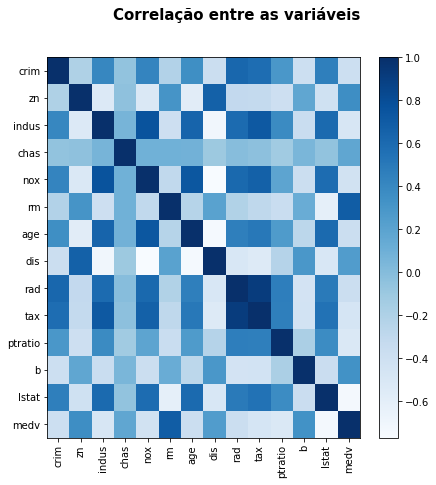

In [ ]:
corr = data.corr()

plt.figure(figsize = (7, 7))
plt.imshow(corr, cmap = 'Blues', interpolation = 'none', aspect = 'auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation = 'vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlação entre as variáveis', fontsize = 15, fontweight = 'bold')
plt.grid(False)
plt.show()

Os dados estão armazenados na matriz:

In [ ]:
print(corr)

             crim        zn     indus  ...         b     lstat      medv
crim     1.000000 -0.200469  0.406583  ... -0.385064  0.455621 -0.388305
zn      -0.200469  1.000000 -0.533828  ...  0.175520 -0.412995  0.360445
indus    0.406583 -0.533828  1.000000  ... -0.356977  0.603800 -0.483725
chas    -0.055892 -0.042697  0.062938  ...  0.048788 -0.053929  0.175260
nox      0.420972 -0.516604  0.763651  ... -0.380051  0.590879 -0.427321
rm      -0.219247  0.311991 -0.391676  ...  0.128069 -0.613808  0.695360
age      0.352734 -0.569537  0.644779  ... -0.273534  0.602339 -0.376955
dis     -0.379670  0.664408 -0.708027  ...  0.291512 -0.496996  0.249929
rad      0.625505 -0.311948  0.595129  ... -0.444413  0.488676 -0.381626
tax      0.582764 -0.314563  0.720760  ... -0.441808  0.543993 -0.468536
ptratio  0.289946 -0.391679  0.383248  ... -0.177383  0.374044 -0.507787
b       -0.385064  0.175520 -0.356977  ...  1.000000 -0.366087  0.333461
lstat    0.455621 -0.412995  0.603800  ... -0.36608

Identificando as variáveis correlacionadas:

In [ ]:
p = 0.75
var = []

for i in corr.columns:
  
  for j in corr.columns:
    
    if i != j:
      
      if np.abs(corr[i][j]) > p:
        
        var.append([i,j])

print('Variáveis mais correlacionadas:\n', var)

Variáveis mais correlacionadas:
 [['indus', 'nox'], ['nox', 'indus'], ['nox', 'dis'], ['dis', 'nox'], ['rad', 'tax'], ['tax', 'rad']]


Muitas vezes, o número de observações difere em cada classe, de modo que os dados são desbalanceados. Podemos verificar o número de elementos em cada classe criando um histograma:

0       van
1       van
2      saab
3       van
4       bus
       ... 
841    saab
842     van
843    saab
844    saab
845     van
Name: Class, Length: 846, dtype: object
[218. 212. 217. 199.]


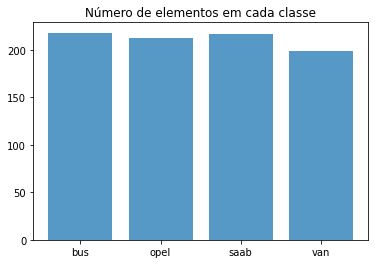

In [ ]:
data = pd.read_csv(root_path + 'vehicle.csv', header = (0))
data.head(10)
classes = data[data.columns[-1]]
print(classes)

cl = np.unique(classes)
ncl = np.zeros(len(cl))

for i in np.arange(0, len(cl)):
  
  a = classes == cl[i]
  ncl[i] = len(classes[a])

print(ncl)
numbers = np.arange(0, len(cl))

plt.bar(numbers, ncl,  alpha = .75)
plt.xticks(numbers, cl)
plt.title('Número de elementos em cada classe')
plt.show(True)

Vamos balancear os dados de forma que cada classe contenha $N$ elementos. Escolhermos $N$ elementos de forma aleatória, sem reposição, de cada classe:

In [ ]:
N = 3
cl = np.unique(classes)
X = np.array(data)
Xnew = []
cls = np.array(data[data.columns[-1]])

for i in np.arange(0, len(cl)):
  
  a = np.argwhere(cls == cl[i])
  inds = np.random.choice(a[:, 0], N, replace = False)
  Xnew.append(X[inds, :])

Xnew = np.array(Xnew)
print('Dados obtidos a partir da amostragem')
print(Xnew)

Dados obtidos a partir da amostragem
[[[85 43 64 128 56 8 150 46 19 144 168 324 173 82 9 14 180 184 'bus']
  [101 42 62 175 67 6 149 43 19 139 169 341 165 65 7 11 202 209 'bus']
  [81 43 68 139 62 7 149 46 19 145 172 323 171 83 1 14 180 184 'bus']]

 [[82 38 53 125 59 5 133 51 18 128 152 259 146 87 0 0 177 183 'opel']
  [89 36 72 141 56 7 138 48 18 126 163 286 130 72 1 1 187 192 'opel']
  [89 40 69 147 58 6 132 50 18 137 155 260 151 61 16 6 203 209 'opel']]

 [[103 51 105 174 56 11 210 32 24 163 222 650 222 73 8 9 187 196 'saab']
  [109 52 104 199 60 12 215 31 24 162 220 691 212 67 11 7 189 199 'saab']
  [96 50 94 215 67 9 187 35 22 158 214 525 214 67 8 6 193 201 'saab']]

 [[96 39 77 160 62 8 140 47 18 150 161 294 124 62 15 3 201 208 'van']
  [88 37 51 105 52 5 119 57 17 128 135 207 125 86 8 16 179 183 'van']
  [89 47 85 147 58 10 153 44 19 151 175 349 186 74 13 7 186 197 'van']]]


Em muitos casos, temos a presença de outliers nos dados. Uma maneira simples de identificar outliers é criando um boxplot:

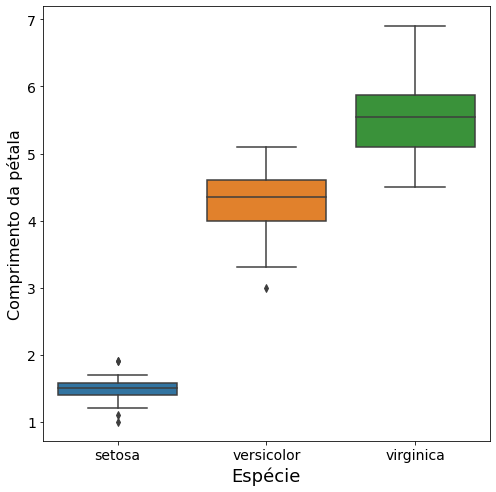

In [ ]:
data = pd.read_csv(root_path + 'iris.csv', header = (0))
plt.figure(figsize = (8, 8))
sns.boxplot(x = "species", y = "petal_length", data = data)
plt.xlabel('Espécie', fontsize = 18)
plt.ylabel('Comprimento da pétala', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show(True)

Podemos ainda usar a distância interquantil (Q3 - Q1) para encontrar os outliers de uma forma simples. Vamos considerar um exemplo.



In [ ]:
np.random.seed(101)

data = pd.DataFrame({'a': np.random.randint(1, 200, 20), 'b': np.random.randint(1, 200, 20), 'c': np.random.randint(1, 200, 20)})
data[data > 150] = data[data > 150] * 10
print (data)

       a     b     c
0     96   112   100
1     12   137    29
2     82   116    64
3     71  1580     8
4     64   116   139
5     88    60  1810
6     76  1630  1850
7    138    45   104
8     41    73    39
9    133    20    74
10    64   127  1810
11  1690   139   147
12    61    77    72
13  1930   108   104
14   111    88   144
15     6   129    45
16   141   106     1
17    41     9   117
18    50    63   107
19    84  1650   141


Visualizando os dados:

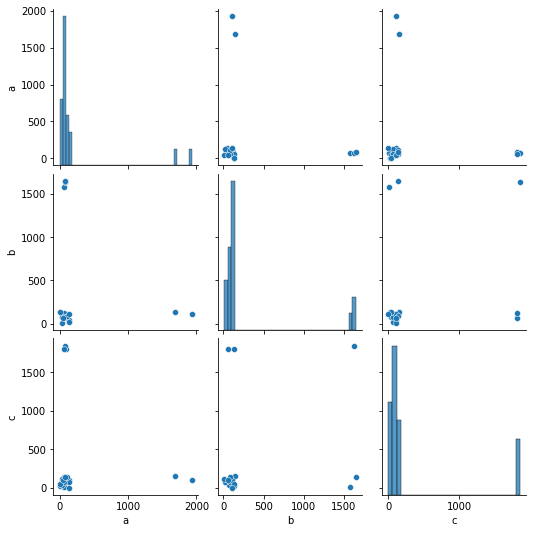

In [ ]:
sns.pairplot(data)
plt.show()

Para encontrar os outliers:

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))))

        a      b      c
0   False  False  False
1   False  False  False
2   False  False  False
3   False   True  False
4   False  False  False
5   False  False   True
6   False   True   True
7   False  False  False
8   False  False  False
9   False  False  False
10  False  False   True
11   True  False  False
12  False  False  False
13   True  False  False
14  False  False  False
15  False  False  False
16  False  False  False
17  False  False  False
18  False  False  False
19  False   True  False


Podemos dizer que uma observação é um outlier se ao menos uma das variáveis está fora dos limites máximos do boxplot. Ou seja, se o valor é menor do que (Q1 - 1.5 IQR) ou maior do que (Q3 + 1.5 IQR). Outliers são indicados como True abaixo:

In [ ]:
print (((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis = 1))

0     False
1     False
2     False
3      True
4     False
5      True
6      True
7     False
8     False
9     False
10     True
11     True
12    False
13     True
14    False
15    False
16    False
17    False
18    False
19     True
dtype: bool


A partir dessa informação, podemos fazer a retirada dos outliers no dados originais:

In [ ]:
v = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis = 1)
data = data.drop(data.index[list(v)], axis = 0)
data.head(25)

,a,b,c
0,96,112,100
1,12,137,29
2,82,116,64
4,64,116,139
7,138,45,104
8,41,73,39
9,133,20,74
12,61,77,72
14,111,88,144
15,6,129,45
